## Basic Octree

Current status: Mostly implemented

WIP: Cleaning skeleton after generation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import time

from skeletor.skeleton import Octree
from skeletor.data import loadTestDataset, loadPointCloud

from tqdm import tqdm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Load a test dataset

In [3]:
# Skeletor provides several test datsets built in.
# To see the full list, you can use printTestDatasets()
dataset = 'double_wireframe_cube_1'
# You can add some artificial (gaussian) noise to the dataset
# to test how each method works as the quality of data gets
# worse. This is given as a fraction of the total system size.
noise = 0.02

points = loadTestDataset(dataset, extraNoise=noise)

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d' if points.shape[-1] == 3 else None)

ax.scatter(*points.T, s=1)
ax.set_title(f'{len(points)} points')
plt.show()

10274


## Load a real dataset

In [4]:
# This should be the path to the dataset file.
dataset = '/home/jack/Workspaces/data/point_clouds/2024-10-21_LG_B_PNG_T4.0_clean.npy'
# The loadPointCloud method can also downsample, randomize, and add noise
# like the test dataset method above, but probably that isn't desired
# in most cases; see the documentation for more details
downsample = 1

points = loadPointCloud(dataset, downsample=downsample)

# Plot
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d' if points.shape[-1] == 3 else None)

# ax.scatter(*points.T, s=1)
# ax.set_title(f'{len(points)} points')
# plt.show()

# Can also plot using the skeleton base class
from skeletor.skeleton import SkeletonBase
print(len(points))
SkeletonBase(points).plot(backend='o3d')

7672096


## Skeletonize

In [6]:
# If verbose is True, the function will print information about
# the calculation
verbose = False
# If debug is True, the function will plot graphs about the
# calculation
debug = False
# The number of boxes to divide the space into.
nBoxes = 1000

# Run the skeletonization
# Compared to other methods, the construction of the octree object
# will do more computation that actually generating the skeleton.
octree = Octree(points, nBoxes=nBoxes, verbose=verbose, debug=debug)
octree.generateSkeleton()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f1f2a20d390>>
Traceback (most recent call last):
  File "/home/jack/miniconda3/envs/311/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
# Can plot either using open3d (backend='o3d') or using
# matplotlib (backend='mpl'); note that for large point
# clouds (>100000 points) matplotlib takes a long time to
# plot, so I would recommend using open3d (the interactive
# features are much nicer in o3d too).
octree.plot(backend='o3d', plotPoints=False)

In [4]:
# The octree-style methods also have the functionality
# to plot the octree structure along with the points/skeleton
octree.plot(backend='o3d', plotPoints=True, plotBoxes=True)

In [18]:
# Make a little animation of the point cloud rotating
# (only relevant for 3D point clouds).
# Might take a lot of memory to save, depending on the length of the
# animation

baseName = dataset.split('/')[-1].split('.')
outputName = '.'.join(baseName[:-1]) if '.' in baseName else baseName[0]
# You can also save it as a .mp4 file, just change the extension.
outputName = '../' + outputName + '.gif'

# You can set the output name to None to just display the animation,
# not save it.
#outputName = None

octree.animate(outputName, maxFrames=180, plotPoints=False, pointSize=2, crop=True)

# Test all available datasets

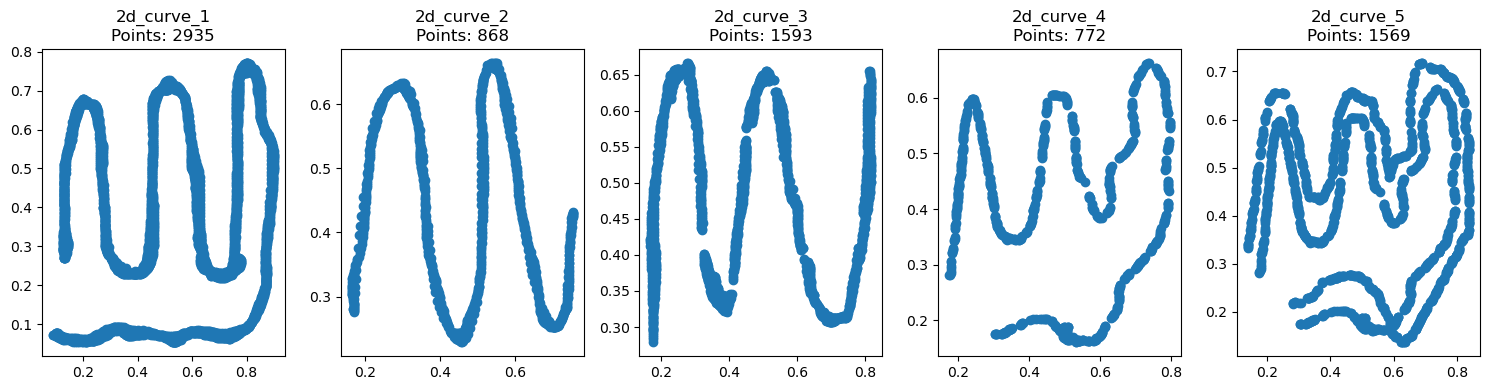

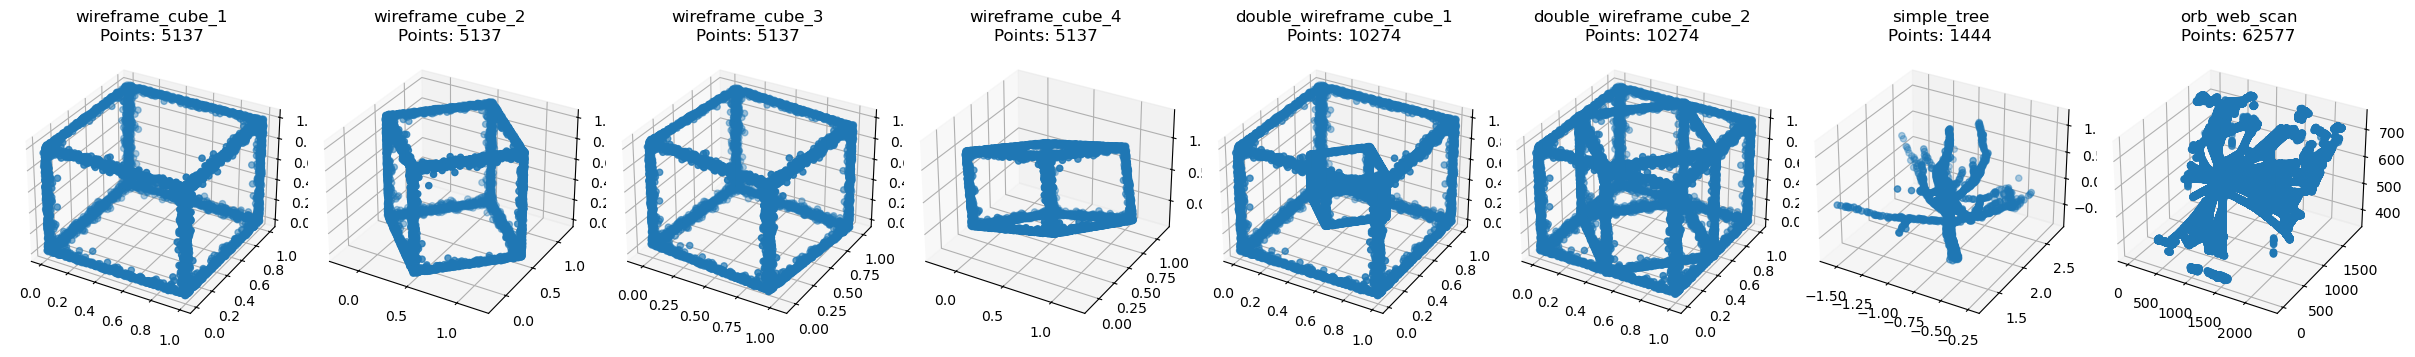

In [5]:
from skeletor.data import plotTestDatasets, TEST_DATASETS_2D, TEST_DATASETS_3D

plotTestDatasets()

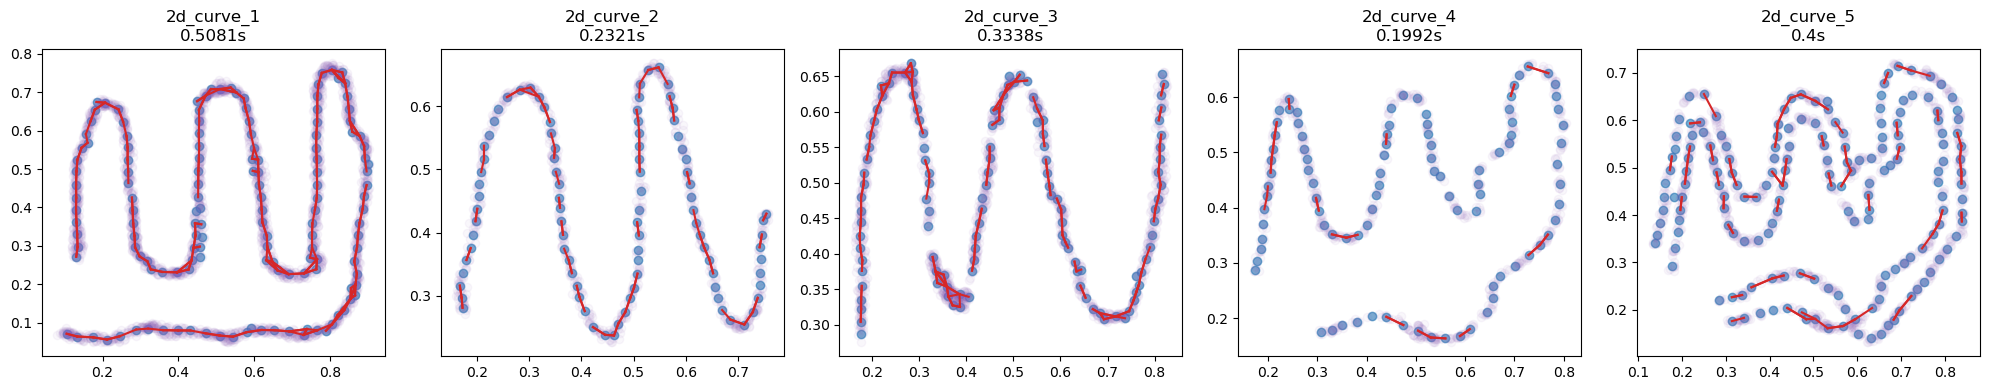

8it [00:48,  6.01s/it]


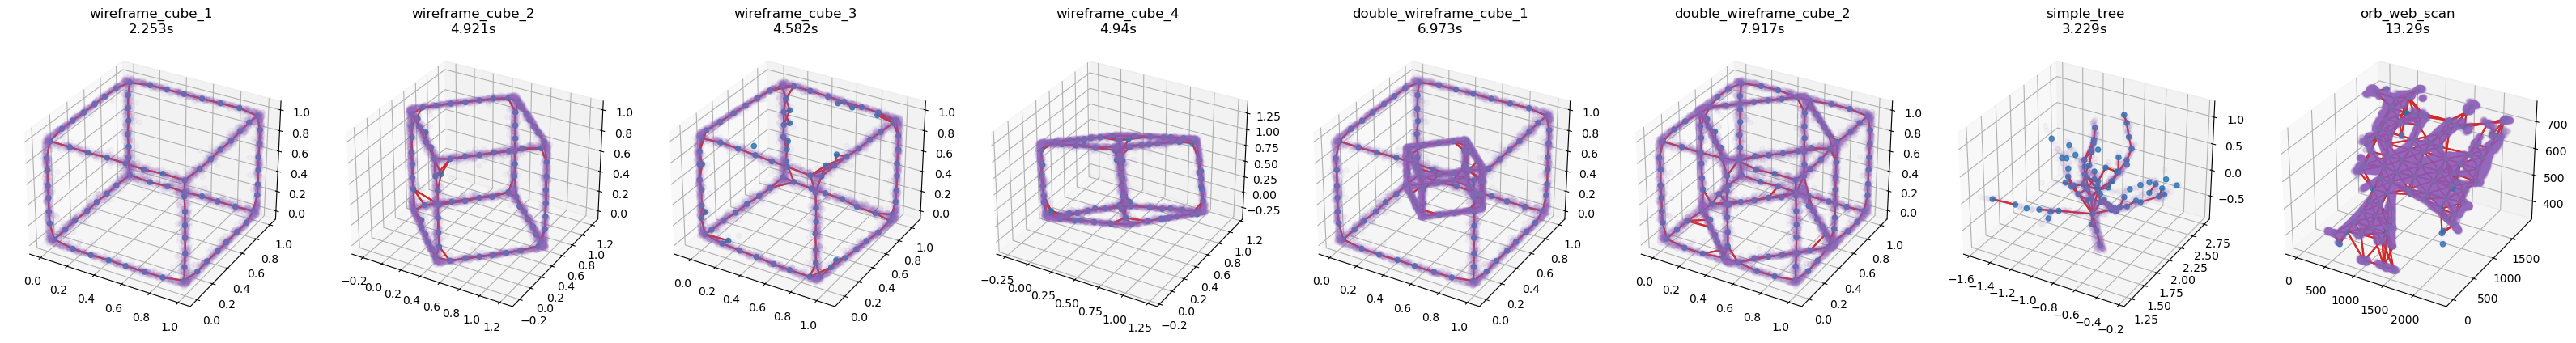

In [7]:
# Parameters
# In reality, there probably isn't a single set of parameters
# that works for every dataset, but this will at least give you
# an idea of what this type of method can achieve.
nBoxes = 500

# 2D Datasets
fig = plt.figure(figsize=(len(TEST_DATASETS_2D)*4,4))

for i, dataset in enumerate(TEST_DATASETS_2D):
    points = loadTestDataset(dataset, extraNoise=.01)
    startTime = time.perf_counter()
    ax = fig.add_subplot(1, len(TEST_DATASETS_2D), i+1)
    
    octree = Octree(points, nBoxes=nBoxes)
    octree.generateSkeleton()

    octree.plot(ax=ax, backend='mpl')
    ax.set_title(f'{dataset}\n{(time.perf_counter() - startTime):.4}s')
    
fig.tight_layout()    
plt.show()

# 3D Datasets
fig = plt.figure(figsize=(len(TEST_DATASETS_3D)*4,4))

for i, dataset in tqdm(enumerate(TEST_DATASETS_3D)):
    points = loadTestDataset(dataset, extraNoise=.01)
    startTime = time.perf_counter()
    ax = fig.add_subplot(1, len(TEST_DATASETS_3D), i+1, projection='3d')
    
    octree = Octree(points, nBoxes=nBoxes)
    octree.generateSkeleton()
    
    octree.plot(ax=ax, backend='mpl')
    ax.set_title(f'{dataset}\n{(time.perf_counter() - startTime):.4}s')
    
fig.tight_layout()    
plt.show()